In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
for col in df.columns :
    print(col , df[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']
math score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score [ 74  88  93  44  75  78  92 

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [9]:
df.rename(
    columns = {
        'race/ethnicity':'race',
        'parental level of education':'parent_edu',
        'test preparation course':'prep_course',
        'math score':'math_score',
        'reading score':'reading_score',
        'writing score':'writing_score'
    } , inplace = True
)

In [10]:
df.columns

Index(['gender', 'race', 'parent_edu', 'lunch', 'prep_course', 'math_score',
       'reading_score', 'writing_score'],
      dtype='object')

In [11]:
df.describe(include=[object])

,gender,race,parent_edu,lunch,prep_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.describe(include='all')

,gender,race,parent_edu,lunch,prep_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [14]:
full_math = df[df['math_score'] == 100]['math_score'].count()
full_reading = df[df.reading_score == 100].reading_score.count()
full_writing = df[df.writing_score == 100].writing_score.count()

print(f'number of students who get full mark in math: {full_math}')
print(f'number of students who get full mark in reading: {full_reading}')
print(f'number of students who get full mark in writing: {full_writing}')

number of students who get full mark in math: 7
number of students who get full mark in reading: 17
number of students who get full mark in writing: 14


In [15]:
pass_score = 50

df['pass_math'] = 'yes'
filt = (df['math_score'] < pass_score)
df.loc[filt, 'pass_math'] = 'no'
df[['math_score', 'pass_math']].head()

df['pass_reading'] = 'yes'
filt = (df['reading_score'] < pass_score)
df.loc[filt, 'pass_reading'] = 'no'
df[['reading_score', 'pass_reading']].head()

df['pass_writing'] = 'yes'
filt = (df['writing_score'] < pass_score)
df.loc[filt, 'pass_writing'] = 'no'
df[['writing_score', 'pass_writing']].head()

df

,gender,race,parent_edu,lunch,prep_course,math_score,reading_score,writing_score,pass_math,pass_reading,pass_writing
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no,yes,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


In [16]:
pass_math_count = df.groupby('pass_math')['pass_math'].count()
pass_math_count

pass_math
no     135
yes    865
Name: pass_math, dtype: int64

In [17]:
pass_reading_count = df.groupby('pass_reading')['pass_reading'].count()
pass_reading_count

pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64

In [18]:
pass_writing_count = df.groupby('pass_writing')['pass_writing'].count()
pass_writing_count

pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64

Average math score : 66.089
Average reading score : 69.169
Average writig score : 68.054


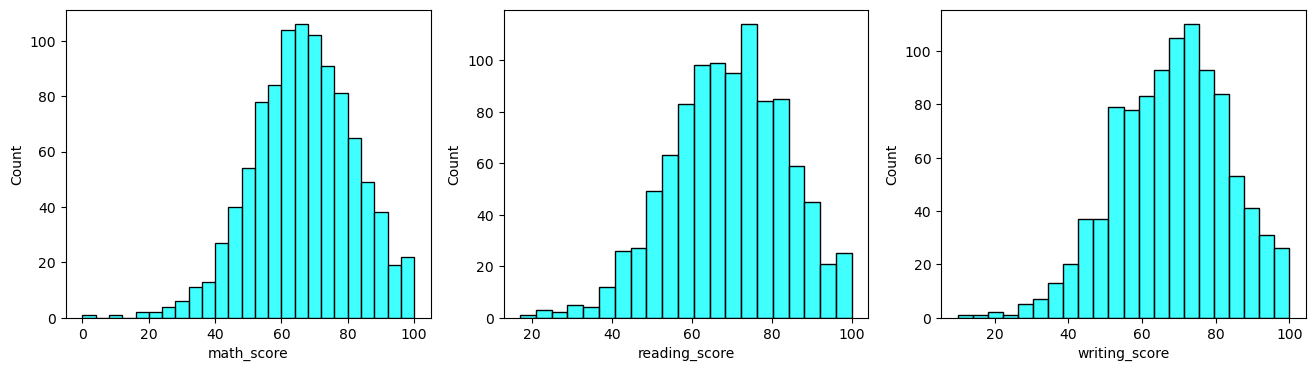

In [19]:
fig , ax = plt.subplots(1,3, figsize = (16,4))

sns.histplot(x = 'math_score' , data = df, ax = ax[0], color = 'cyan')
sns.histplot(x = 'reading_score' , data = df, ax = ax[1], color = 'cyan')
sns.histplot(x = 'writing_score' , data = df, ax = ax[2], color = 'cyan')

mean_math = df['math_score'].mean()
mean_reading = df['reading_score'].mean()
mean_writing = df['writing_score'].mean()

print(f'Average math score : {mean_math}\nAverage reading score : {mean_reading}\nAverage writig score : {mean_writing}')
plt.show()

pass_math
no     135
yes    865
Name: pass_math, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


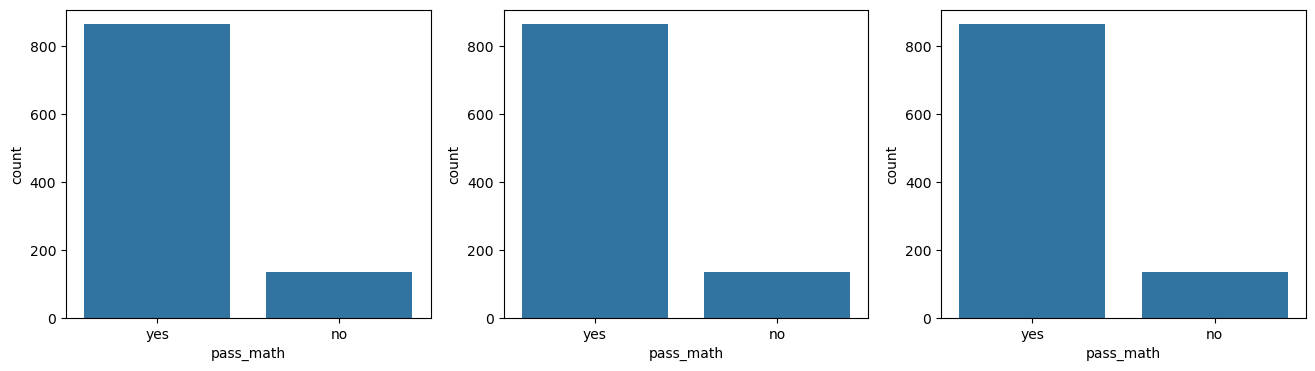

In [20]:
fig , ax = plt.subplots(1,3, figsize = (16,4))

sns.countplot(x = 'pass_math', data = df, ax = ax[0])
sns.countplot(x = 'pass_math', data = df, ax = ax[1])
sns.countplot(x = 'pass_math', data = df, ax = ax[2])

count_pass_math = df.groupby('pass_math')['pass_math'].count()
print(count_pass_math)
count_pass_reading = df.groupby('pass_reading')['pass_reading'].count()
print(count_pass_reading)
count_pass_writing = df.groupby('pass_writing')['pass_writing'].count()
print(count_pass_writing)

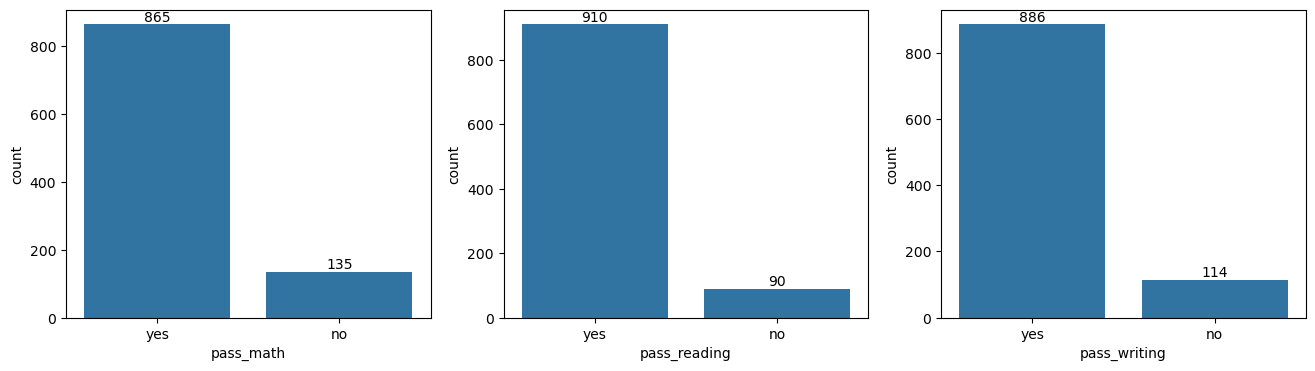

In [21]:
fig , ax = plt.subplots(1,3, figsize = (16,4))

bar1 = sns.countplot(x='pass_math', data=df, ax=ax[0])
bar2 = sns.countplot(x='pass_reading', data=df, ax=ax[1])
bar3 = sns.countplot(x='pass_writing', data=df, ax=ax[2])

bar1.bar_label(bar1.containers[0])
bar2.bar_label(bar2.containers[0])
bar3.bar_label(bar3.containers[0])

plt.show()

## wrong output

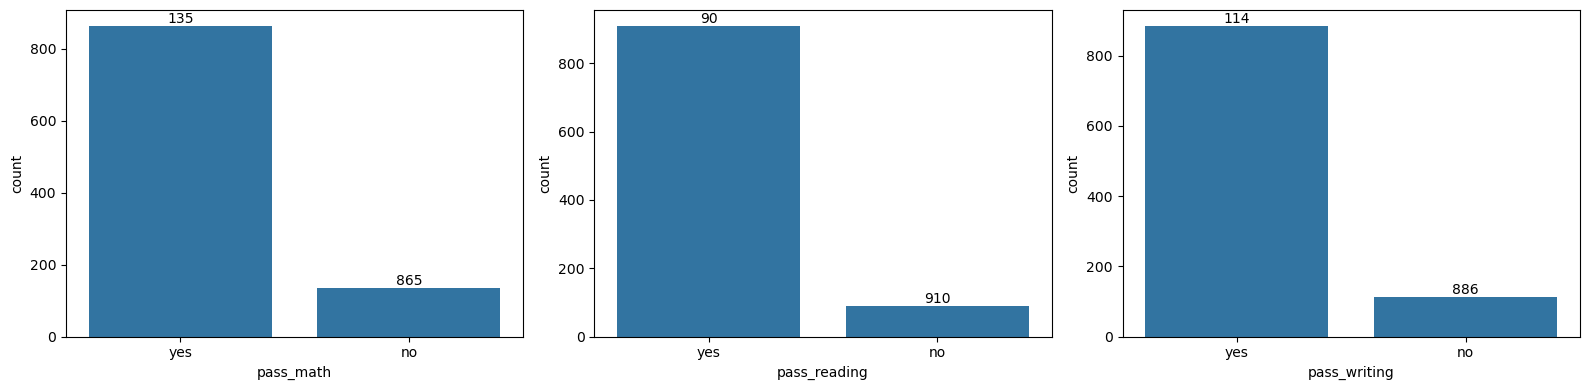

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

bar1 = sns.countplot(x='pass_math', data=df, ax=ax[0])
bar2 = sns.countplot(x='pass_reading', data=df, ax=ax[1])
bar3 = sns.countplot(x='pass_writing', data=df, ax=ax[2])

count_pass_math = df['pass_math'].value_counts().sort_index()
count_pass_reading = df['pass_reading'].value_counts().sort_index()
count_pass_writing = df['pass_writing'].value_counts().sort_index()

labels_math = count_pass_math.values.tolist()
labels_reading = count_pass_reading.values.tolist()
labels_writing = count_pass_writing.values.tolist()

bar1.bar_label(bar1.containers[0], labels=labels_math)
bar2.bar_label(bar2.containers[0], labels=labels_reading)
bar3.bar_label(bar3.containers[0], labels=labels_writing)

plt.tight_layout()
plt.show()

## correct output but long and complicated

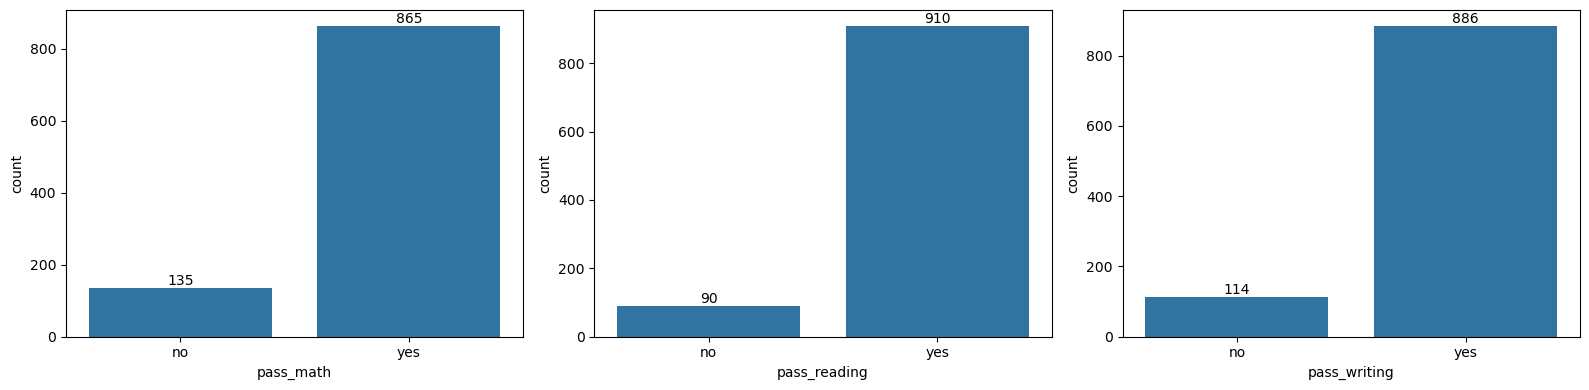

In [23]:
count_pass_math = df['pass_math'].value_counts().sort_index()
count_pass_reading = df['pass_reading'].value_counts().sort_index()
count_pass_writing = df['pass_writing'].value_counts().sort_index()

order_math = count_pass_math.index.tolist()
order_reading = count_pass_reading.index.tolist()
order_writing = count_pass_writing.index.tolist()

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

bar1 = sns.countplot(x='pass_math', data=df, ax=ax[0], order=order_math)
bar2 = sns.countplot(x='pass_reading', data=df, ax=ax[1], order=order_reading)
bar3 = sns.countplot(x='pass_writing', data=df, ax=ax[2], order=order_writing)

labels_math = count_pass_math.values.tolist()
labels_reading = count_pass_reading.values.tolist()
labels_writing = count_pass_writing.values.tolist()

bar1.bar_label(bar1.containers[0], labels=labels_math)
bar2.bar_label(bar2.containers[0], labels=labels_reading)
bar3.bar_label(bar3.containers[0], labels=labels_writing)

plt.tight_layout()
plt.show()

In [33]:
for col in df.columns :
    print(col , df[col].unique())

gender ['female' 'male']
race ['group B' 'group C' 'group A' 'group D' 'group E']
parent_edu ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
prep_course ['none' 'completed']
math_score [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score [ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28

([<matplotlib.patches.Wedge at 0x1c57b0828d0>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.20%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.80%')])

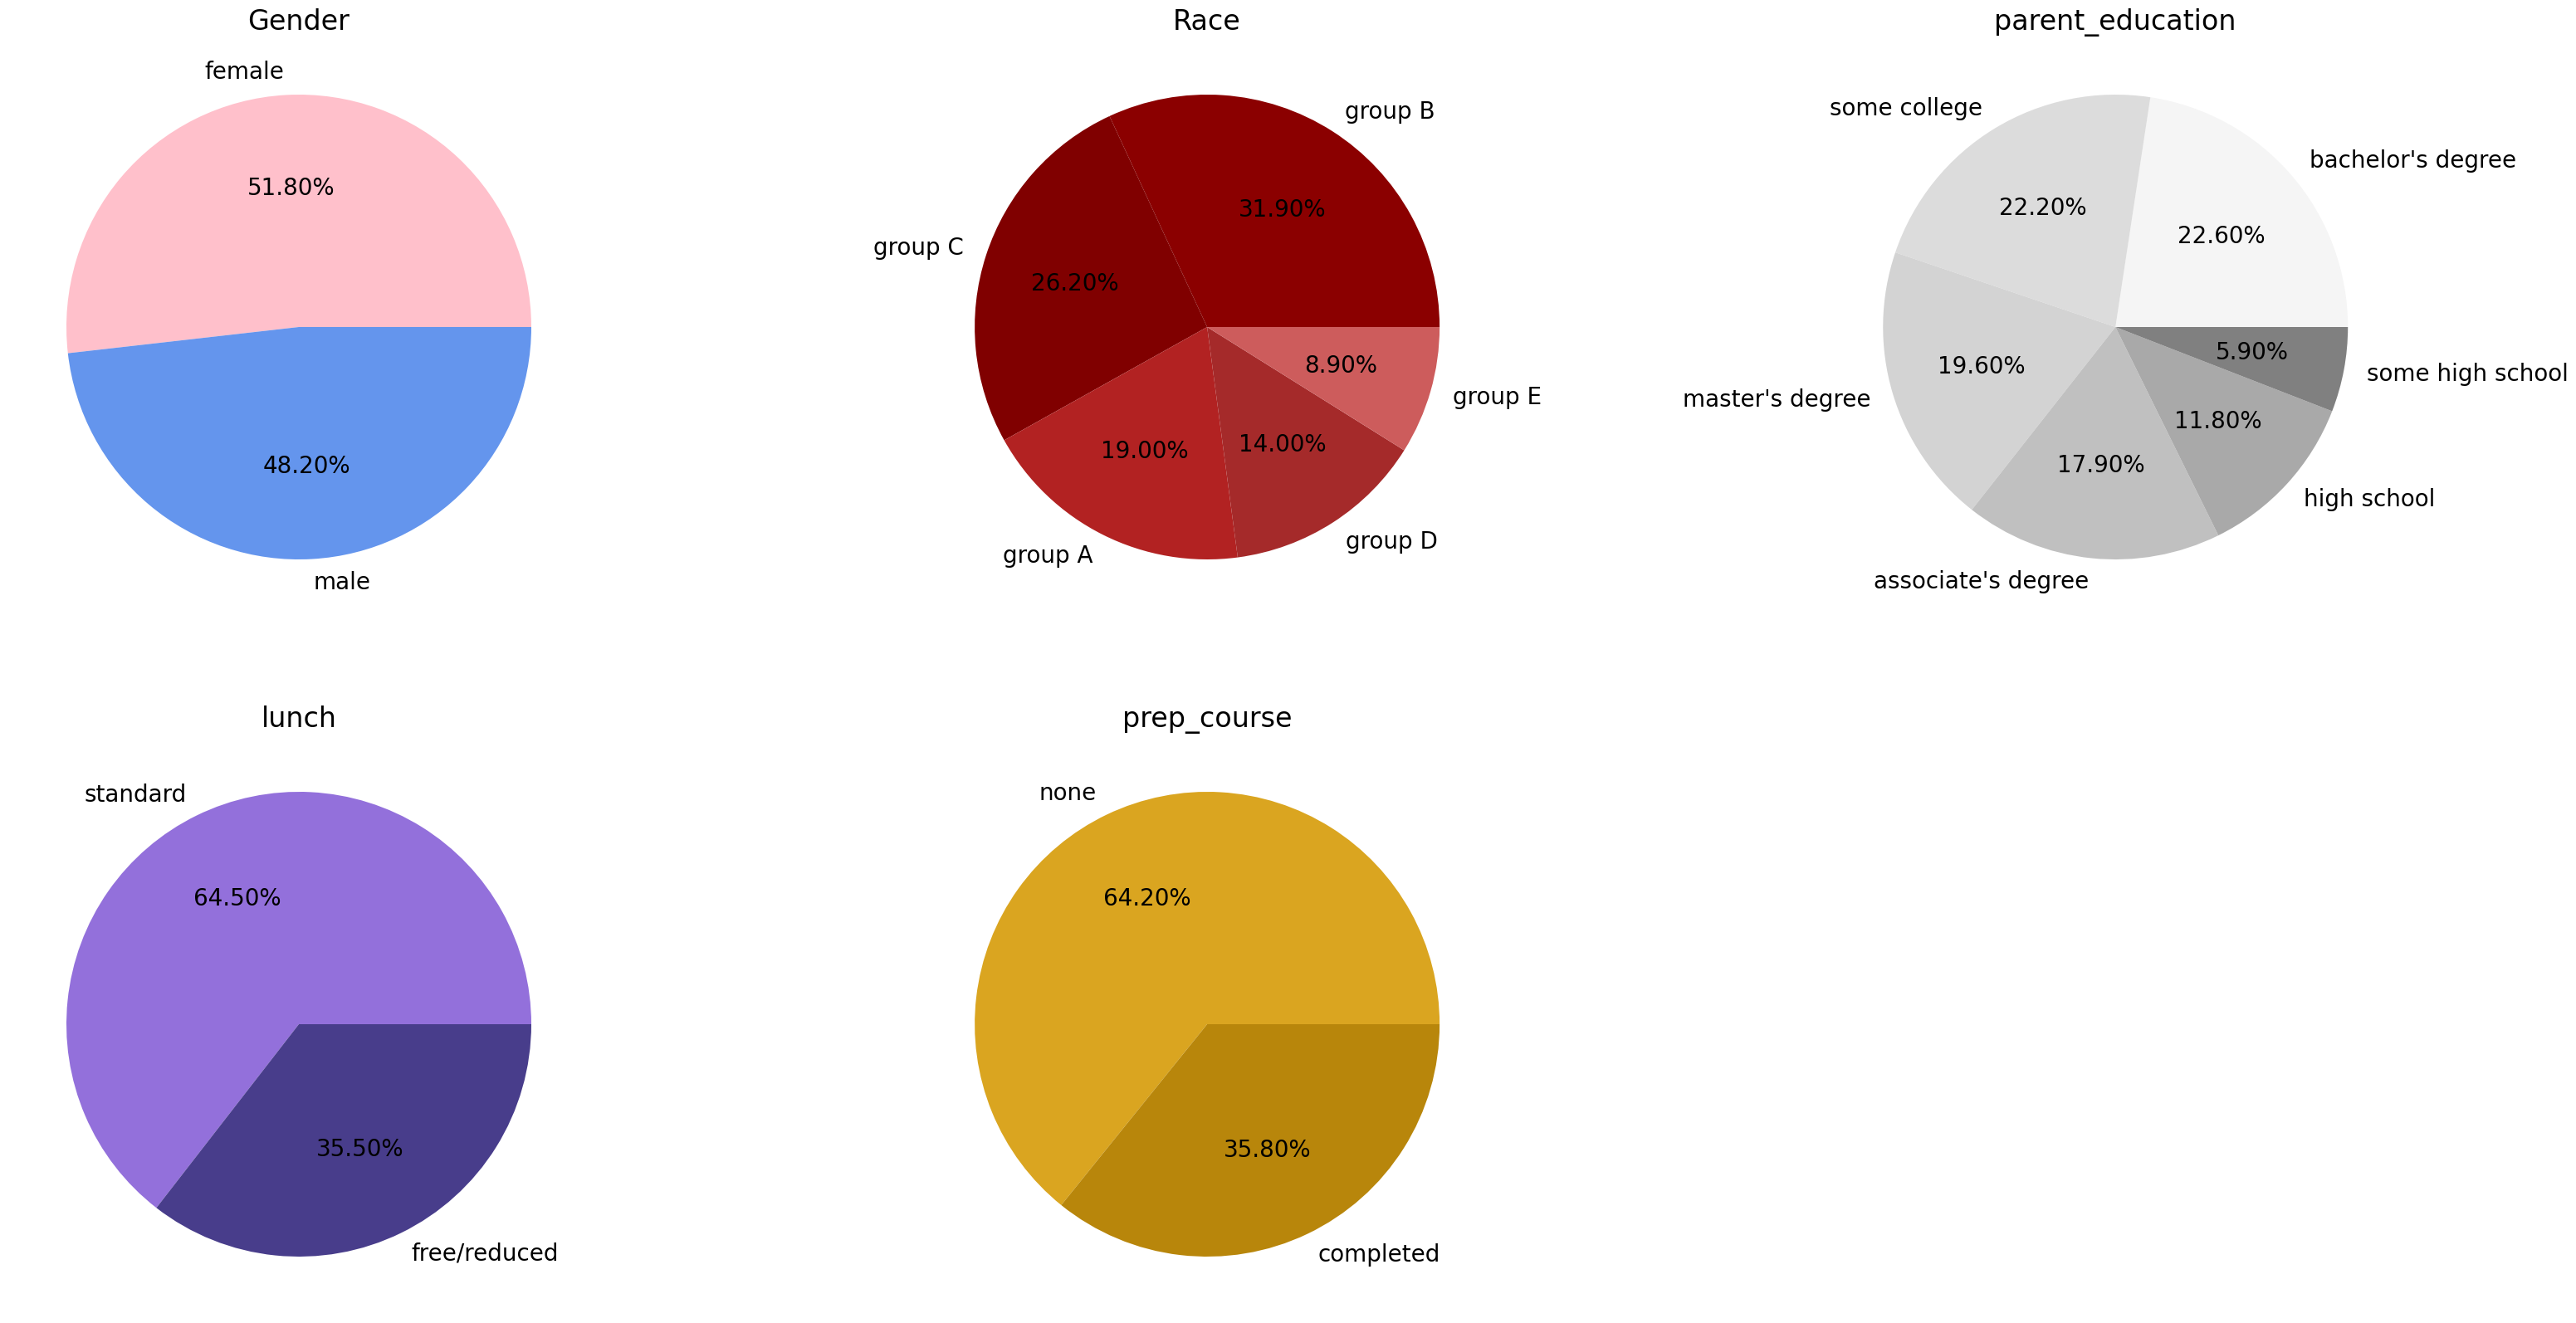

In [39]:
plt.rcParams['figure.figsize'] = (40,20)
plt.rcParams['font.size'] = 20


plt.subplot(2,3,1)
size = df['gender'].value_counts()
labels = ['female', 'male']
colors = ['pink', 'cornflowerblue']
plt.title('Gender')
plt.pie(size, labels = labels, colors = colors, autopct= '%.2f%%')

plt.subplot(2,3,2)
size = df['race'].value_counts()
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
colors = ['darkred', 'maroon', 'firebrick', 'brown', 'indianred']
plt.title('Race')
plt.pie(size, labels = labels, colors = colors, autopct= '%.2f%%')

plt.subplot(2,3,3)
size = df['parent_edu'].value_counts()
labels = ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
colors = ['whitesmoke', 'gainsboro', 'lightgray', 'silver', 'darkgray', 'gray']
plt.title('parent_education')
plt.pie(size, labels = labels, colors = colors, autopct= '%.2f%%')

plt.subplot(2,3,4)
size = df['lunch'].value_counts()
labels =  ['standard', 'free/reduced']
colors = ['mediumpurple', 'darkslateblue']
plt.title('lunch')
plt.pie(size, labels = labels, colors = colors, autopct= '%.2f%%')

plt.subplot(2,3,5)
size = df['prep_course'].value_counts()
labels = ['none', 'completed']
colors = ['goldenrod', 'darkgoldenrod']
plt.title('prep_course')
plt.pie(size, labels = labels, colors = colors, autopct= '%.2f%%')

<Axes: title={'center': 'Gender VS Writing Score'}, xlabel='gender', ylabel='writing_score'>

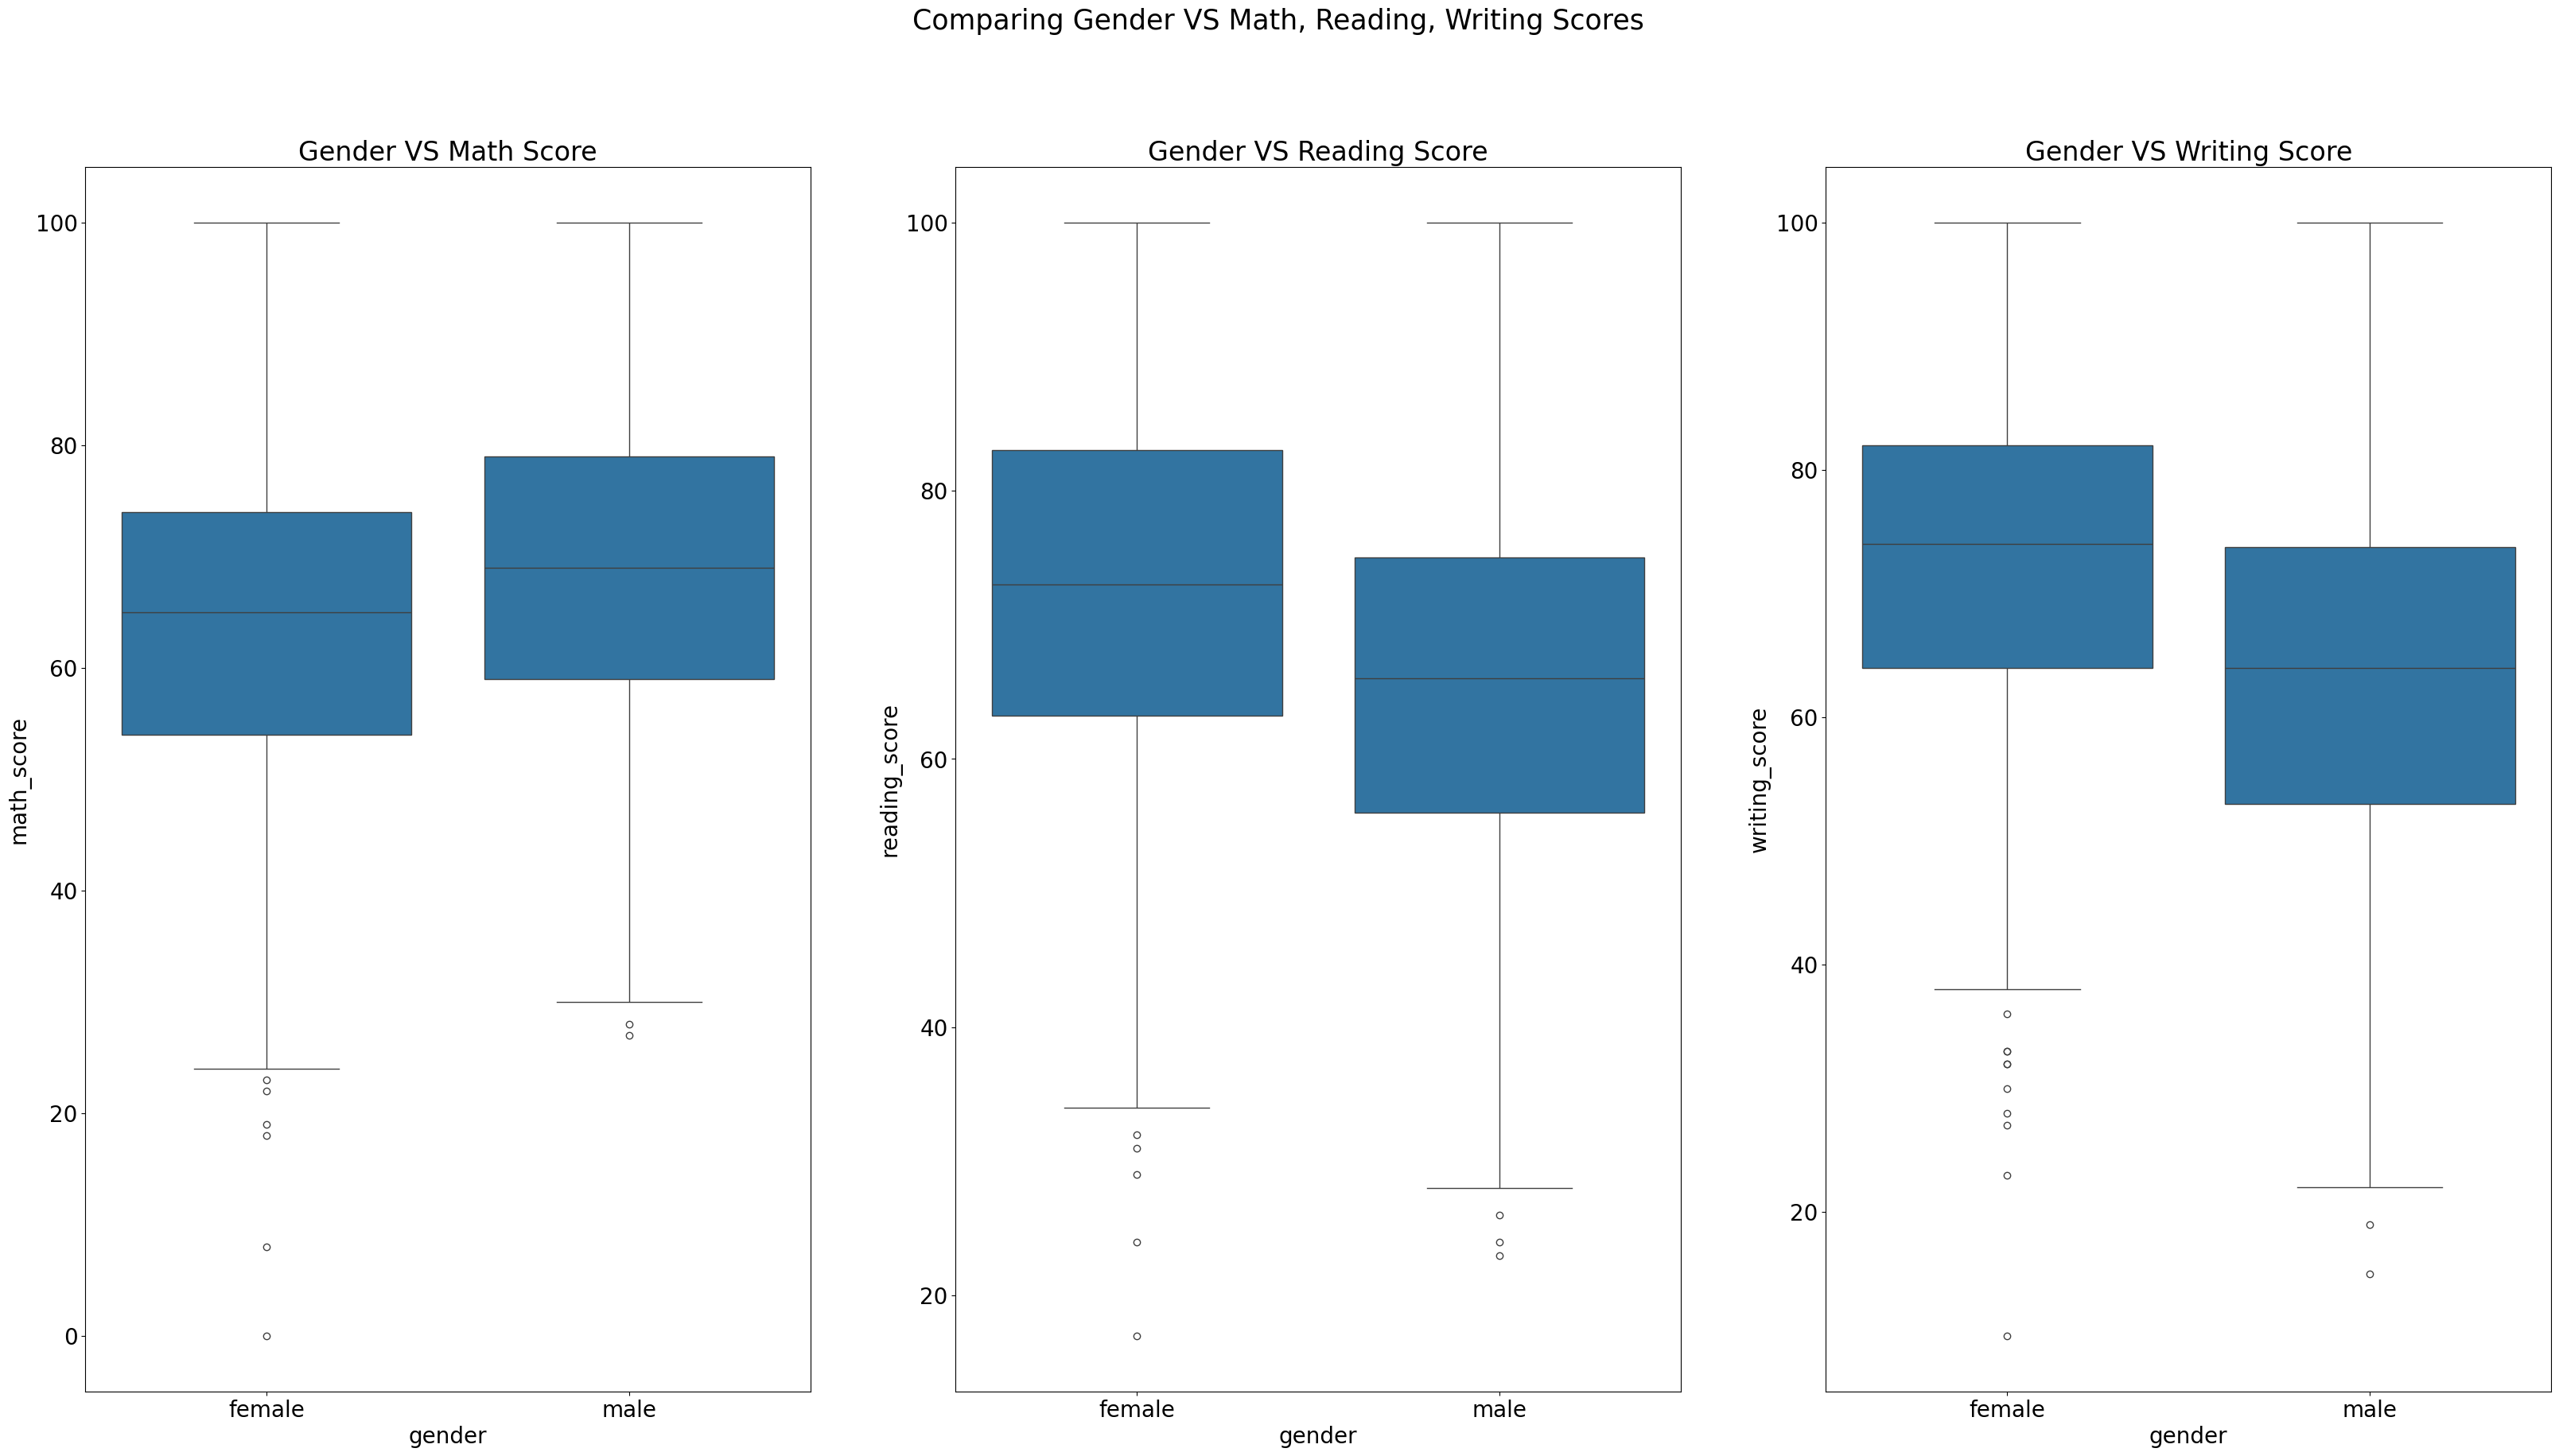

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.suptitle('Comparing Gender VS Math, Reading, Writing Scores', fontsize = 25)

ax1.title.set_text('Gender VS Math Score')
sns.boxplot(x = 'gender', y = 'math_score', data = df, ax = ax1)

ax2.title.set_text('Gender VS Reading Score')
sns.boxplot(x = 'gender', y = 'reading_score', data = df, ax = ax2)

ax3.title.set_text('Gender VS Writing Score')
sns.boxplot(x = 'gender', y = 'writing_score', data = df, ax = ax3)

C:\Users\User\AppData\Local\Temp\ipykernel_9896\269959486.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
C:\Users\User\AppData\Local\Temp\ipykernel_9896\269959486.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)
C:\Users\User\AppData\Local\Temp\ipykernel_9896\269959486.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)


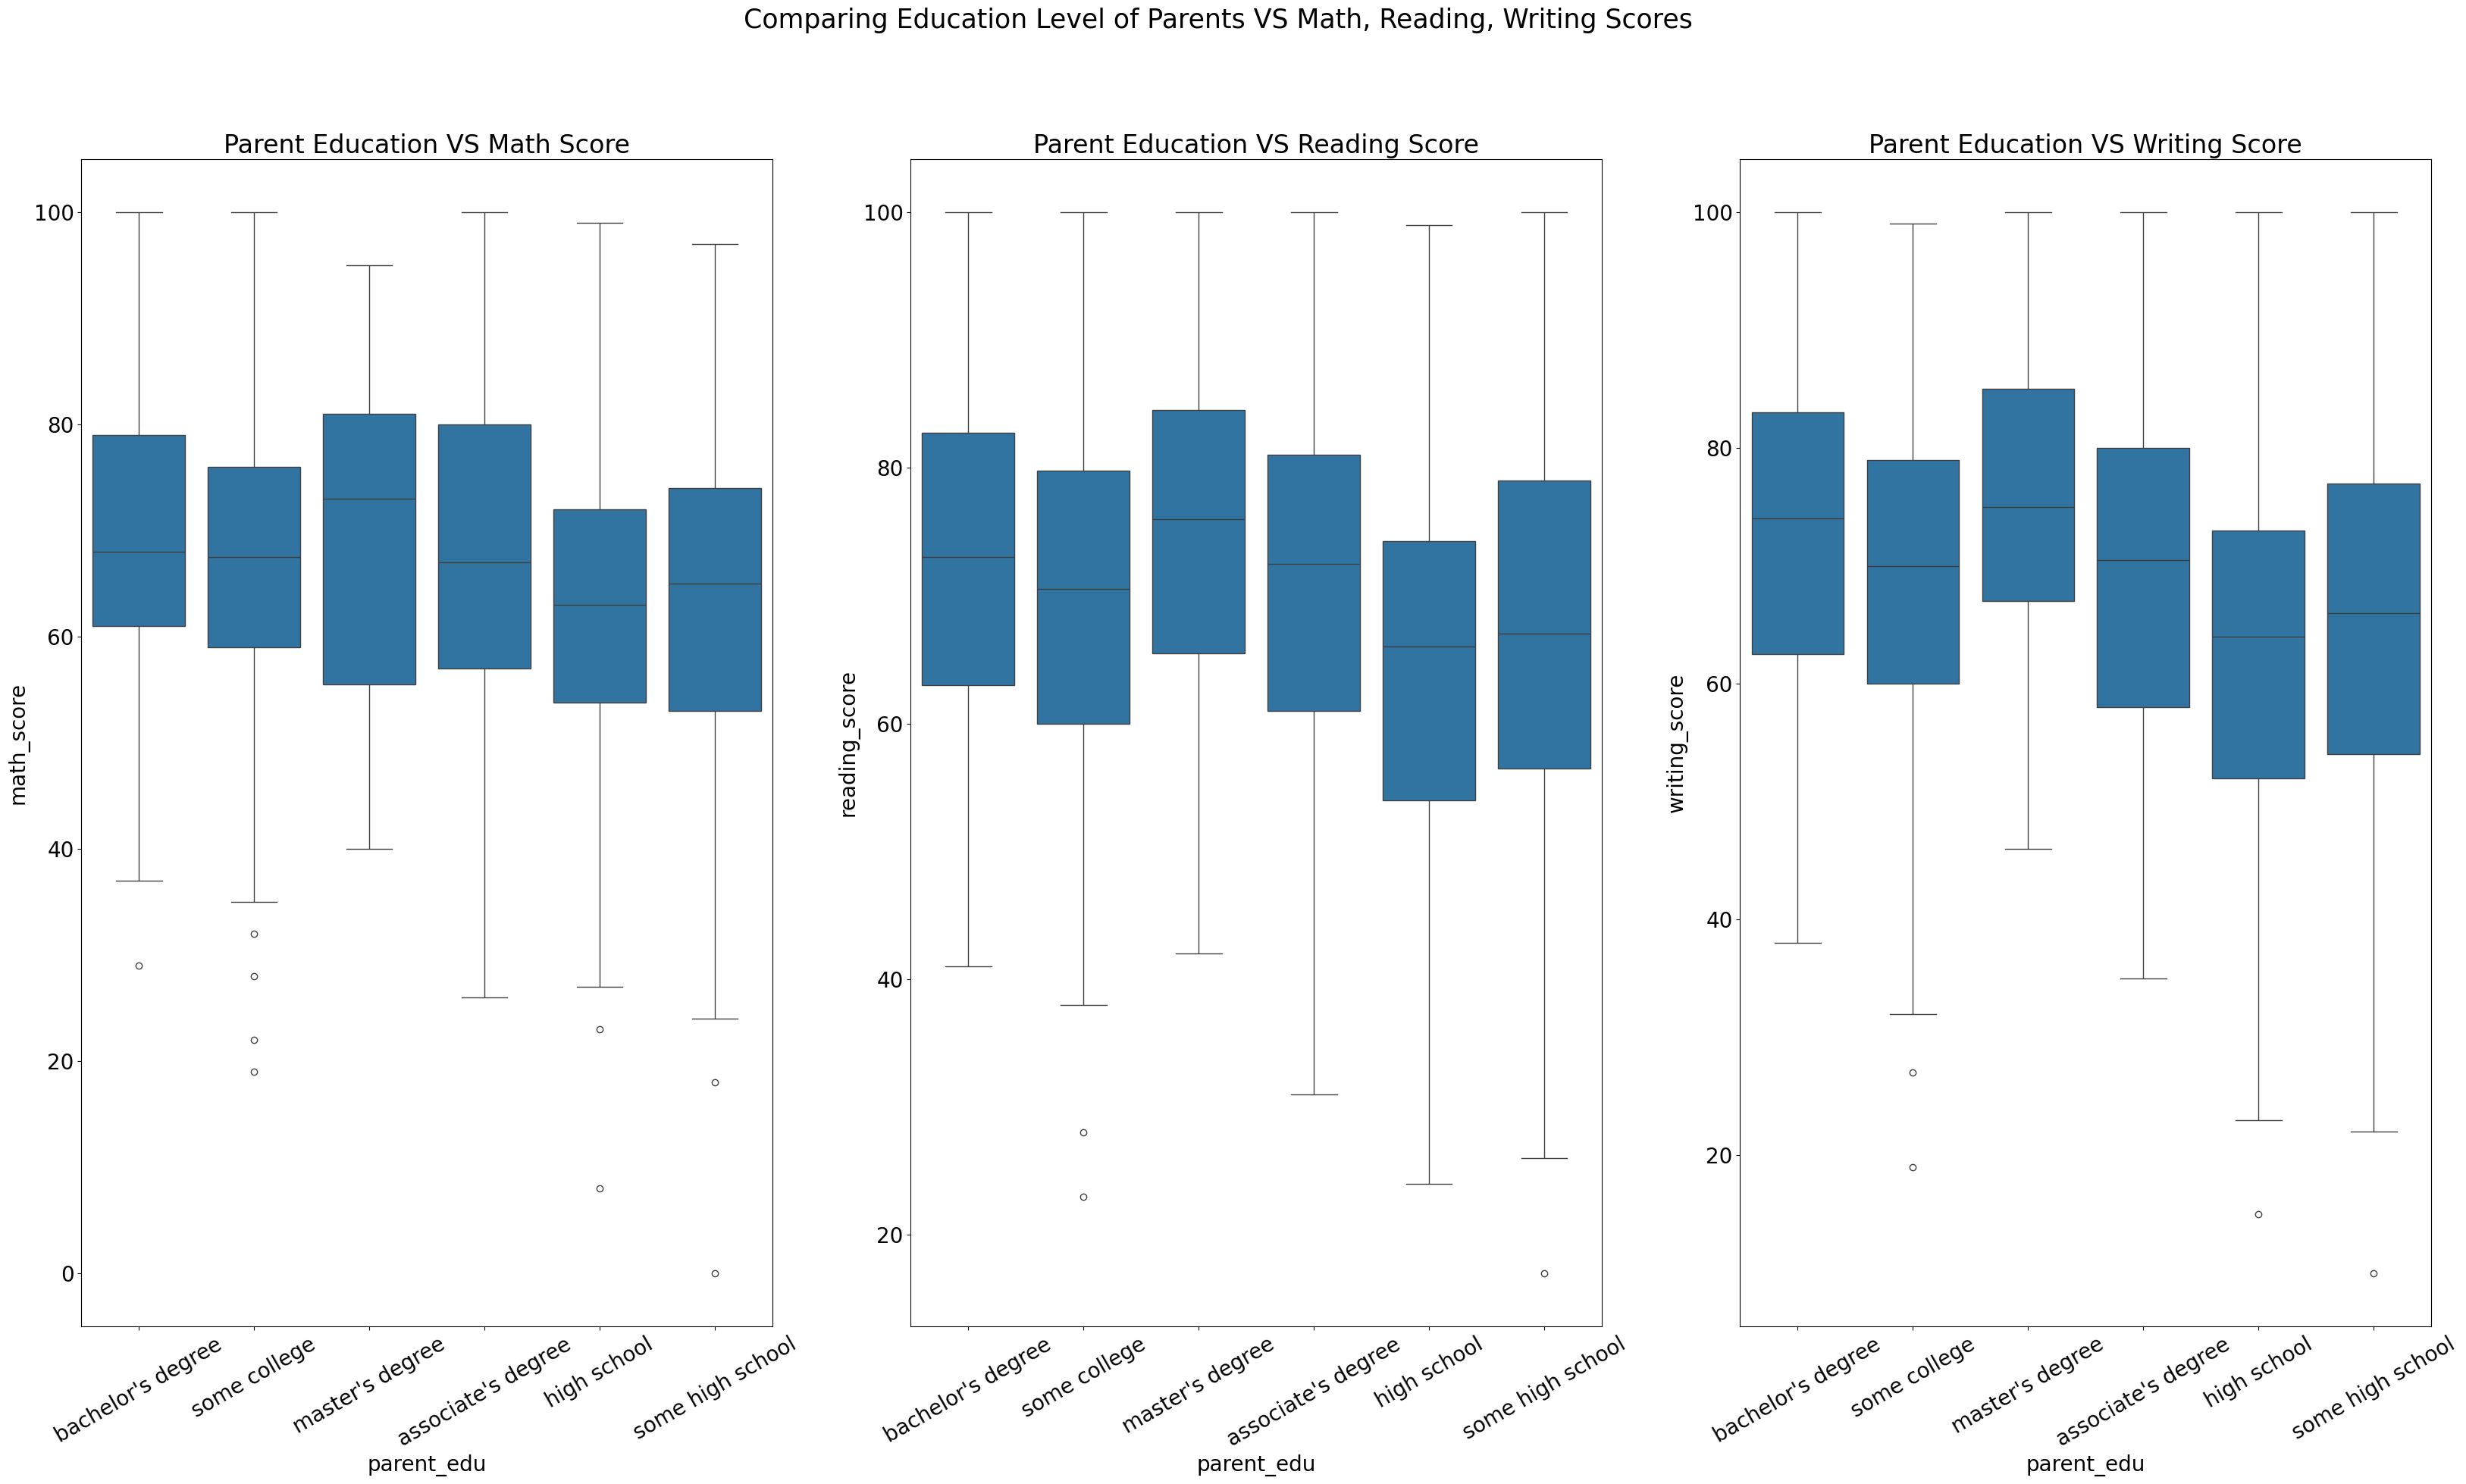

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.suptitle('Comparing Education Level of Parents VS Math, Reading, Writing Scores', fontsize = 25)

ax1.title.set_text('Parent Education VS Math Score')
sns.boxplot(x = 'parent_edu', y = 'math_score', data = df, ax = ax1)
var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

ax2.title.set_text('Parent Education VS Reading Score')
sns.boxplot(x = 'parent_edu', y = 'reading_score', data = df, ax = ax2)
var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

ax3.title.set_text('Parent Education VS Writing Score')
sns.boxplot(x = 'parent_edu', y = 'writing_score', data = df, ax = ax3)
var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=30)

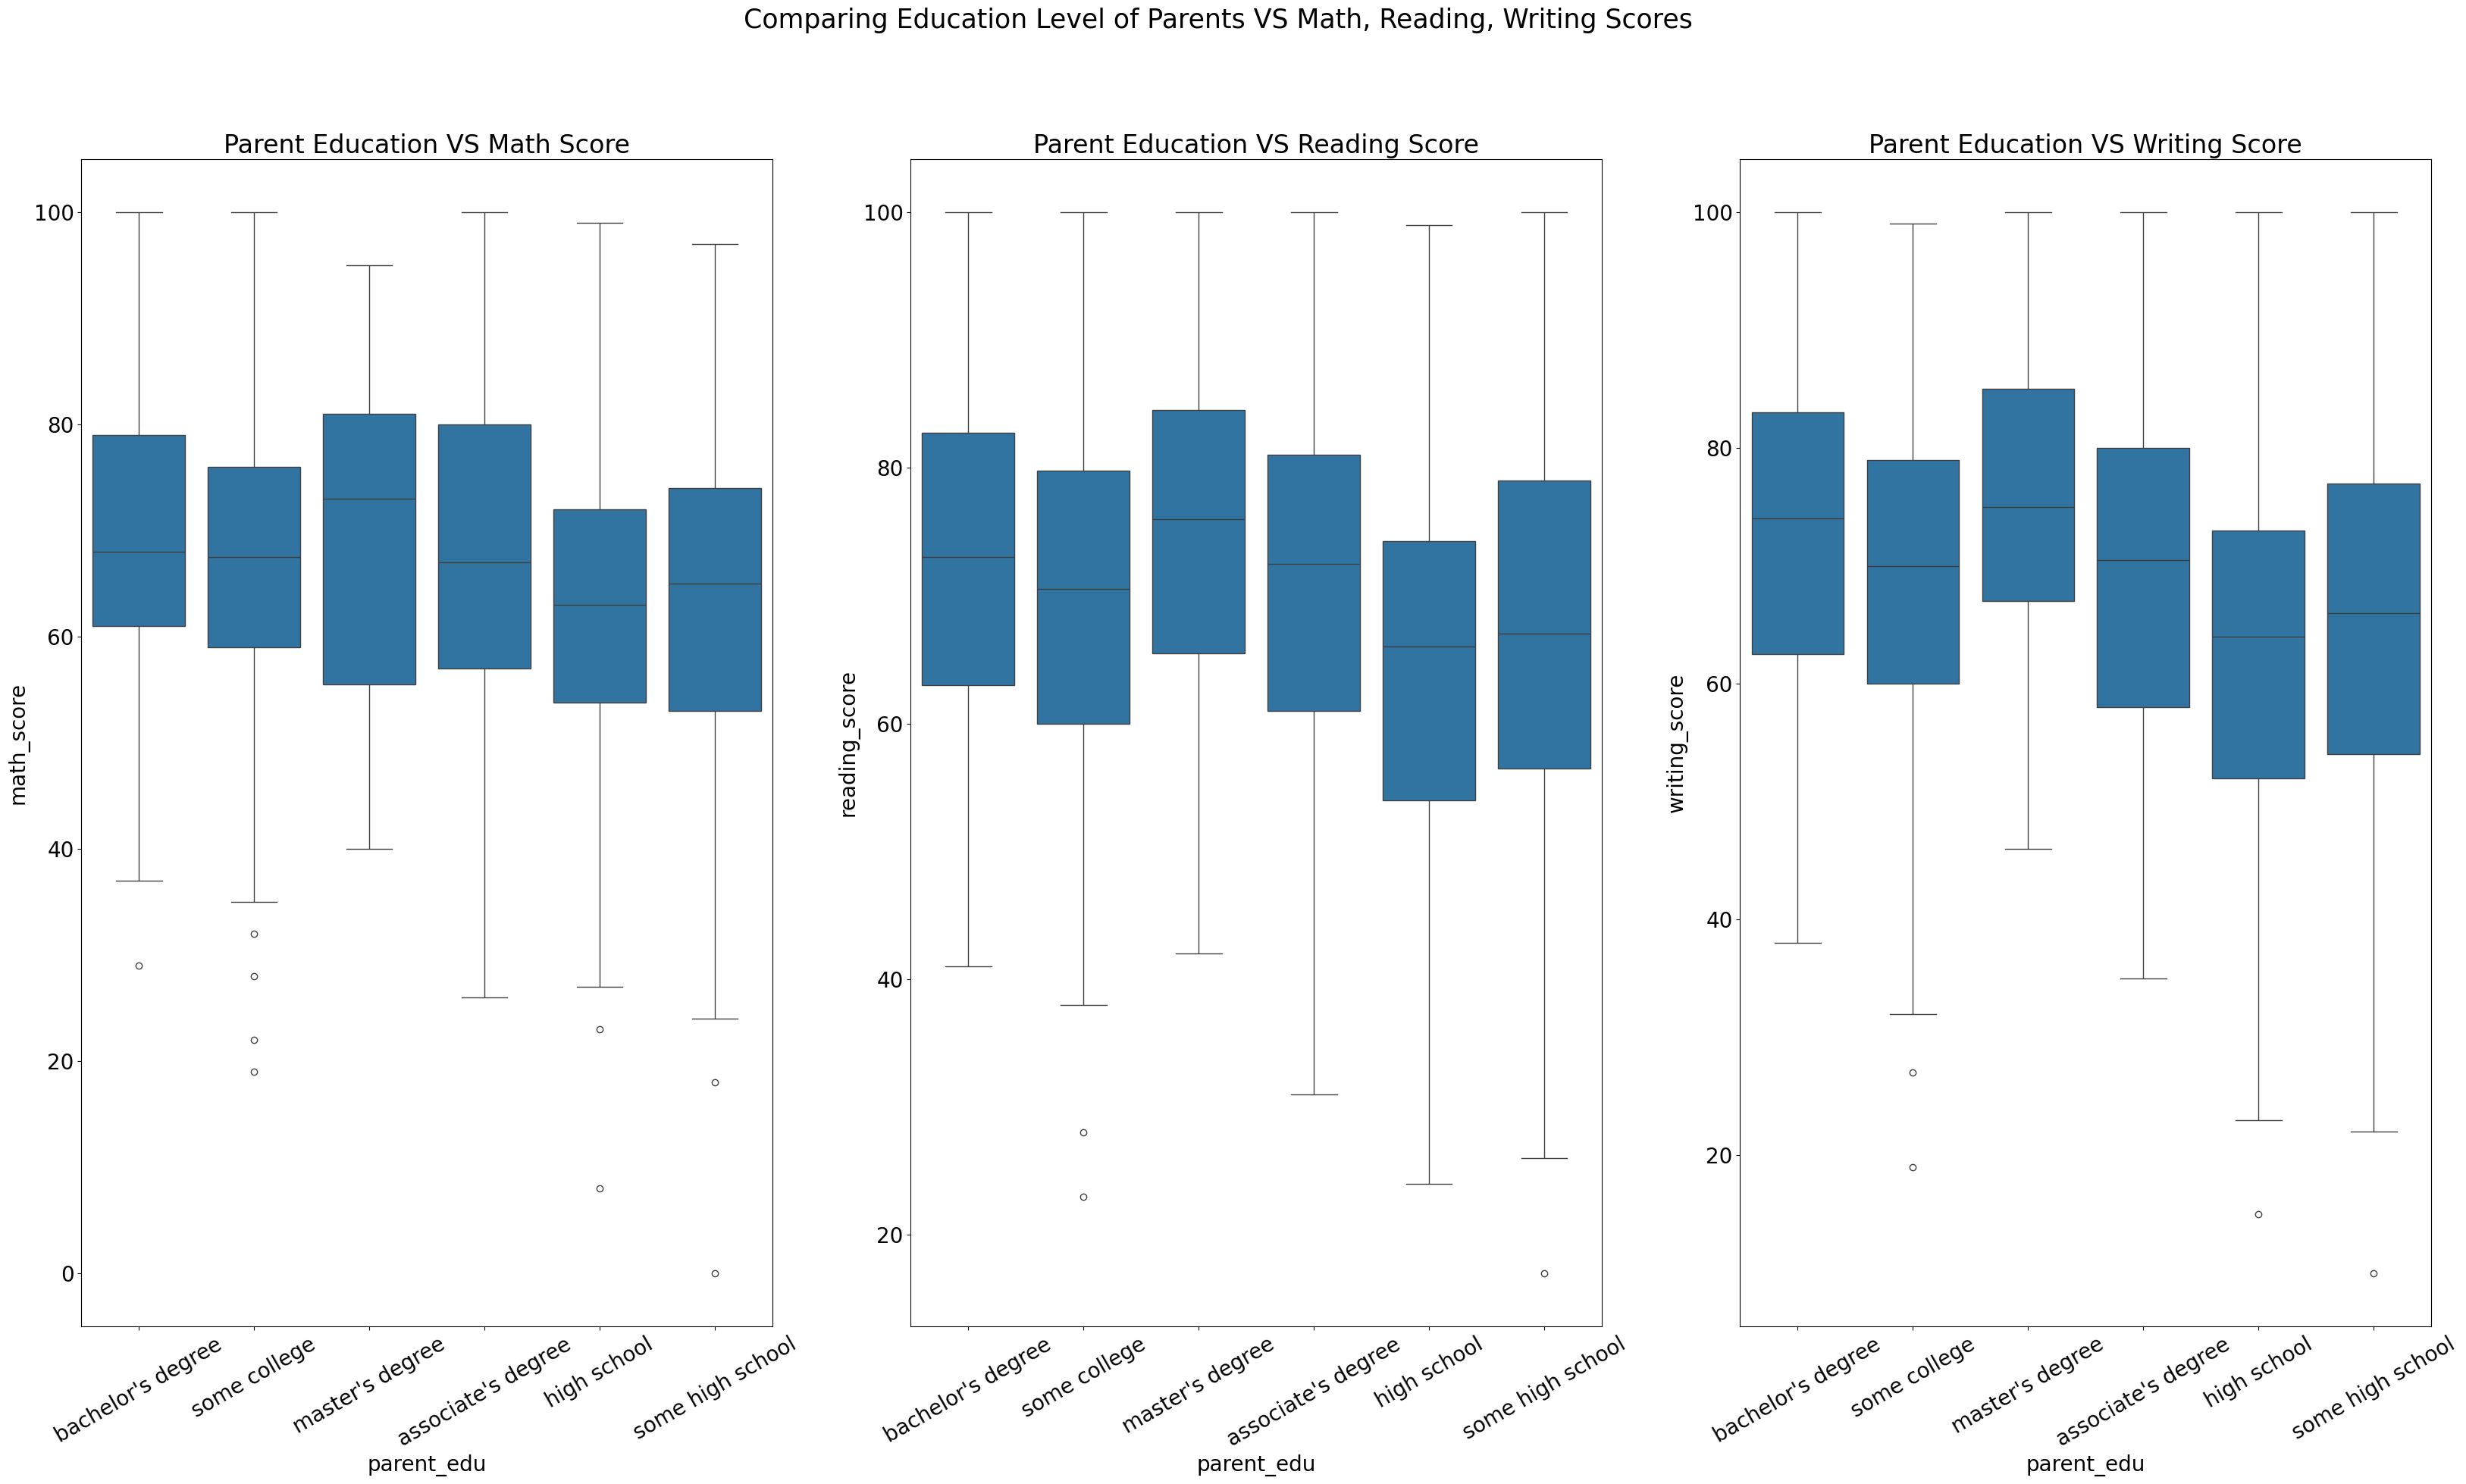

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.suptitle('Comparing Education Level of Parents VS Math, Reading, Writing Scores', fontsize = 25)

ax1.title.set_text('Parent Education VS Math Score')
sns.boxplot(x = 'parent_edu', y = 'math_score', data = df, ax = ax1)
ax1.tick_params(axis='x', rotation=30)

ax2.title.set_text('Parent Education VS Reading Score')
sns.boxplot(x = 'parent_edu', y = 'reading_score', data = df, ax = ax2)
ax2.tick_params(axis='x', rotation=30)

ax3.title.set_text('Parent Education VS Writing Score')
sns.boxplot(x = 'parent_edu', y = 'writing_score', data = df, ax = ax3)
ax3.tick_params(axis='x', rotation=30)